# Modelling Real Data

## Tools

### 1. Scikit-Learn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
import numpy as np
import random

x_raw = []
y_raw = []
for n in range(1, 40):
    x_raw.append(n + random.random() * 2 - 1)
    y_raw.append((1 + random.random() / 3) * n + random.random() * 10 / n)
    
x_raw = np.array(x_raw)
y_raw = np.array(y_raw)

In [11]:
model = LinearRegression(fit_intercept=True) # setting the formula to a0 + a1*x

# shape the data
x_data = x_raw.reshape(len(y_raw), 1)
y_data = y_raw.reshape(len(y_raw), 1)

model_fit = model.fit(x_data, y_data)

# linear model parameters
intercept = model.intercept_[0]
slope = model.coef_[0,0]

# predict
future_x = [[30]]
future_y = model.predict(future_x)

print(future_x[0][0], ", ", future_y[0][0])

30 ,  35.981905453438486


### 2. Statsmodels

In [12]:
from statsmodels.formula.api import ols

In [13]:
import numpy as np
import pandas as pd
import random

x_raw = []
y_raw = []
for n in range(1, 40):
    x_raw.append(n + random.random() * 2 - 1)
    y_raw.append((1 + random.random() / 3) * n + random.random() * 10 / n)
    
x_raw = np.array(x_raw)
y_raw = np.array(y_raw)

In [14]:
df = pd.DataFrame(dict(times=x_raw, distances=y_raw))

# fit model
model_fit = ols(formula="distances ~ times", data=df).fit()

# extract a0 and a1
a0 = model_fit.params['Intercept']
a1 = model_fit.params['times']

# uncertainty
e0 = model_fit.bse['Intercept']
e1 = model_fit.bse['times']

print("Intercept: ", a0)
print("Slope: ", a1)
print("Uncertainty of intercept: ", e0)
print("Uncertainty of slope: ", e1)

Intercept:  0.43948349047010604
Slope:  1.1730390573479175
Uncertainty of intercept:  0.784846424929159
Uncertainty of slope:  0.03410279619488343


## Limits of Prediction

### Domain of validity

When the step size is too large, the actual pattern of the data might be lost

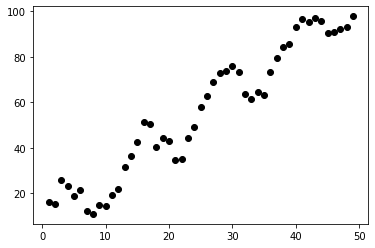

In [15]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

x_raw = []
y_raw = []
for n in range(1, 50):
    x_raw.append(n)
    y_raw.append(2*n + 10*math.sin(n/2) + 10*random.random())
    
x_raw = np.array(x_raw)
y_raw = np.array(y_raw)

plt.plot(x_raw, y_raw, linestyle=" ", marker="o", color="black")
plt.show()

In the model above, there is a clear wave function. But, if we do not take enough points, we get a plot like:

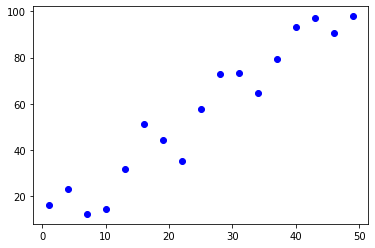

In [16]:
x_stepped = x_raw[::3]
y_stepped = y_raw[::3]

plt.plot(x_stepped, y_stepped, linestyle=" ", marker="o", color="blue")
plt.show()

In this case, the data looks linear with some noise. Fitting a linear model would be inaccurate (high RSS). However, if we zoom into a small range (e.g. x=32 to x=40), the high order terms in the taylor series tends to zero. We can then use a linear model.

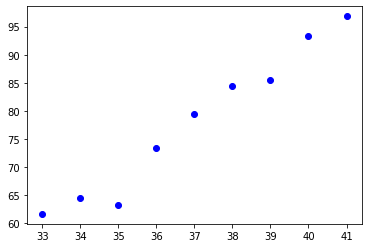

In [17]:
x_zoom = x_raw[32:41]
y_zoom = y_raw[32:41]

plt.plot(x_zoom, y_zoom, linestyle=" ", marker="o", color="blue")
plt.show()

Hence within the small range (aka domain of validity), the model holds. Sometimes, extrapolating slightly outside the range is fine but zooming out too far causes the model to break, introducing a higher uncertainty.

## Goodness of Fit

RSS is used to build models by finding the optimum value of the model parameters. It is **not** used to evaluate the model as even the optimized model parameters does not make the model itself a good fit. 
  
Instead, we use 2 measures: RMSE and R-squared.

In [18]:
import numpy as np
import pandas as pd
import random

x_data = []
y_data = []
for n in range(1, 40):
    x_data.append(n + random.random() * 2 - 1)
    y_data.append((1 + random.random() / 3) * n + random.random() * 10 / n)
    
x_data = np.array(x_data)
y_data = np.array(y_data)

In [19]:
from statsmodels.formula.api import ols

model_fit = ols(formula="y ~ x", data=dict(x=x_data, y=y_data)).fit()
a0 = model_fit.params["Intercept"]
a1 = model_fit.params["x"]

y_model = a0 + a1 * x_data

### 1. Root Mean Squared Error (RMSE)

**$RMSE = \sqrt{\frac{RSS}{n}}$**

In [20]:
# find RSS
residuals = y_model - y_data
rss = np.sum(np.square(residuals)) # variance of residuals

# find RMSE
mean_squared_residuals = rss / len(residuals) # mse
rmse = np.sqrt(mean_squared_residuals) # std of residuals
print(rmse)

2.4727961177217384


**$RMSE = std(residuals)$**

In [21]:
rmse = np.std(residuals)
print(rmse)

2.4727961177217384


### 2. R-Squared

How much of the variation of the data is due to the linear trend and how much is not.

**$R-Squared = 1 - \frac{RSS}{Var}$**  
**$R-Squared = Correlation(y_{data}, y_{model})$**

<img src="Images/r-squared low.png" width=300 align='left'>
<img src="Images/r-squared high.png" width=300 align='left'>  

When the variation due to linear trend is larger than the variation due to residuals, the model is better. For a small slope, any randomness can mask the actual relationship.

In [22]:
# deviations
deviations = np.mean(y_data) - y_data
var = np.sum(np.square(deviations))

# residuals
residuals = y_model - y_data
rss = np.sum(np.square(residuals))

# r-squared
r_squared = 1 - (rss/var)
r_squared = np.corrcoef(y_data, y_model)[1,0]

print(r_squared)

0.981107153260718


## Standard Error

Similar to how RMSE measures residual spread and hence quantifies prediction goodness, standard error is a measure of the uncertainty of the optimal parameter values.

In [23]:
import numpy as np
import pandas as pd
import random

x_data = []
y_data = []
for n in range(1, 40):
    x_data.append(n + random.random() * 2 - 1)
    y_data.append((1 + random.random() / 3) * n + random.random() * 10 / n)
    
x_data = np.array(x_data)
y_data = np.array(y_data)

In [24]:
df = pd.DataFrame(dict(times=x_data, distances=y_data))

model_fit = ols(formula="distances ~ times", data=df).fit()

a0 = model_fit.params['Intercept']
a1 = model_fit.params['times']

# Standard Errors
e0 = model_fit.bse['Intercept']
e1 = model_fit.bse['times']